<a href="https://colab.research.google.com/github/ddale23/data300/blob/main/First_Class_Data_300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#import a data set that I uploaded on github
url = 'https://raw.githubusercontent.com/ddale23/data300/main/data_200_wr_data.csv'
data_frame = pd.read_csv(url)

#check data frame
print(data_frame)

     Unnamed: 0 position        full_name  ... carries rec_gm  ay_per_targ
0             1       WR   Krishawn Hogan  ...     NaN    NaN          NaN
1             2       WR  KeeSean Johnson  ...     0.0   1.88        10.87
2             3       WR    Isaac Whitney  ...     NaN    NaN          NaN
3             4       WR      Jaron Brown  ...     NaN    NaN          NaN
4             5       WR    Andy Isabella  ...     1.0   1.91        11.26
..          ...      ...              ...  ...     ...    ...          ...
642         643       WR      Speedy Noil  ...     NaN    NaN          NaN
643         644       WR      Chris Finke  ...     NaN    NaN          NaN
644         645       WR  Thomas Sperbeck  ...     NaN    NaN          NaN
645         646       WR     Mason Kinsey  ...     NaN    NaN          NaN
646         647       WR     Mikah Holder  ...     NaN    NaN          NaN

[647 rows x 17 columns]


In [7]:
#adjusting the data in the data frame

#carries per game
data_frame['car_gm'] = data_frame.apply(lambda row: round(row.carries / row.games, 3), axis = 1)

#receptions per game
data_frame['rec_gm'] = data_frame.apply(lambda row: round(row.receptions / row.games, 2), axis = 1)

#targets per game
data_frame['tar_gm'] = data_frame.apply(lambda row: round(row.targets / row.games, 2), axis = 1)

#filtering when rec_gm > 2.5
new_data = data_frame[data_frame["rec_gm"] > 2.5]

#filtering when games > 8
new_data = data_frame[data_frame["games"] > 8]

#final output of the adjusted attributes
new_data 

,Unnamed: 0,position,full_name,first_name,last_name,inch_height,weight,games,receptions,targets,receiving_yards,receiving_tds,receiving_air_yards,receiving_yards_after_catch,carries,rec_gm,ay_per_targ,car_gm,tar_gm
4,5,WR,Andy Isabella,Andy,Isabella,69.0,190.0,11.0,21.0,35.0,224.0,2.0,394.0,82.0,1.0,1.91,11.26,0.091,3.18
5,6,WR,DeAndre Hopkins,DeAndre,Hopkins,73.0,212.0,16.0,115.0,160.0,1407.0,6.0,1417.0,534.0,1.0,7.19,8.86,0.062,10.00
9,10,WR,Larry Fitzgerald,Larry,Fitzgerald,75.0,218.0,13.0,54.0,72.0,409.0,1.0,432.0,185.0,0.0,4.15,6.00,0.000,5.54
10,11,WR,Christian Kirk,Christian,Kirk,71.0,200.0,14.0,48.0,79.0,621.0,6.0,935.0,175.0,2.0,3.43,11.84,0.143,5.64
12,13,WR,Calvin Ridley,Calvin,Ridley,73.0,190.0,15.0,90.0,143.0,1374.0,9.0,2052.0,275.0,5.0,6.00,14.35,0.333,9.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,336,WR,Kalif Raymond,Kalif,Raymond,68.0,182.0,9.0,9.0,16.0,187.0,0.0,286.0,38.0,1.0,1.00,17.88,0.111,1.78
339,340,WR,Terry McLaurin,Terry,McLaurin,72.0,210.0,16.0,93.0,141.0,1193.0,4.0,1371.0,487.0,2.0,5.81,9.72,0.125,8.81
340,341,WR,Cam Sims,Cam,Sims,77.0,214.0,12.0,39.0,61.0,581.0,1.0,683.0,272.0,1.0,3.25,11.20,0.083,5.08
346,347,WR,Isaiah Wright,Isaiah,Wright,74.0,220.0,12.0,27.0,36.0,197.0,0.0,151.0,143.0,3.0,2.25,4.19,0.250,3.00


In [8]:
#selecting columns we want to include
convert_data = new_data[['full_name', 'inch_height', 'weight', 'tar_gm', 'rec_gm', 'car_gm', 'ay_per_targ']]
print(convert_data)

#set a limit on the number of targets (we don't want wr's who aren't target often)
convert_data = convert_data.loc[convert_data['tar_gm'] >= 5]

convert_data

            full_name  inch_height  weight  tar_gm  rec_gm  car_gm  ay_per_targ
4       Andy Isabella         69.0   190.0    3.18    1.91   0.091        11.26
5     DeAndre Hopkins         73.0   212.0   10.00    7.19   0.062         8.86
9    Larry Fitzgerald         75.0   218.0    5.54    4.15   0.000         6.00
10     Christian Kirk         71.0   200.0    5.64    3.43   0.143        11.84
12      Calvin Ridley         73.0   190.0    9.53    6.00   0.333        14.35
..                ...          ...     ...     ...     ...     ...          ...
335     Kalif Raymond         68.0   182.0    1.78    1.00   0.111        17.88
339    Terry McLaurin         72.0   210.0    8.81    5.81   0.125         9.72
340          Cam Sims         77.0   214.0    5.08    3.25   0.083        11.20
346     Isaiah Wright         74.0   220.0    3.00    2.25   0.250         4.19
347       Steven Sims         70.0   176.0    3.42    2.50   0.167         7.29

[132 rows x 7 columns]


,full_name,inch_height,weight,tar_gm,rec_gm,car_gm,ay_per_targ
5,DeAndre Hopkins,73.0,212.0,10.00,7.19,0.062,8.86
9,Larry Fitzgerald,75.0,218.0,5.54,4.15,0.000,6.00
10,Christian Kirk,71.0,200.0,5.64,3.43,0.143,11.84
12,Calvin Ridley,73.0,190.0,9.53,6.00,0.333,14.35
16,Julio Jones,75.0,220.0,7.56,5.67,0.000,11.24
...,...,...,...,...,...,...,...
324,Mike Evans,77.0,231.0,6.55,4.05,0.000,13.31
327,Corey Davis,75.0,209.0,6.27,4.33,0.000,11.62
331,A.J. Brown,72.0,226.0,7.73,5.07,0.000,10.94
339,Terry McLaurin,72.0,210.0,8.81,5.81,0.125,9.72


In [9]:
#converting to numpy array so that we can 
array_nfl_data = convert_data.to_numpy()

array_nfl_data

array([['DeAndre Hopkins', 73.0, 212.0, 10.0, 7.19, 0.062, 8.86],
       ['Larry Fitzgerald', 75.0, 218.0, 5.54, 4.15, 0.0, 6.0],
       ['Christian Kirk', 71.0, 200.0, 5.64, 3.43, 0.143, 11.84],
       ['Calvin Ridley', 73.0, 190.0, 9.53, 6.0, 0.333, 14.35],
       ['Julio Jones', 75.0, 220.0, 7.56, 5.67, 0.0, 11.24],
       ['Russell Gage', 72.0, 184.0, 6.81, 4.5, 0.125, 8.5],
       ['Marquise Brown', 69.0, 170.0, 6.44, 3.83, 0.167, 13.4],
       ['Stefon Diggs', 72.0, 191.0, 10.37, 7.74, 0.053, 10.89],
       ['John Brown', 71.0, 179.0, 5.92, 3.58, 0.0, 12.0],
       ['Cole Beasley', 68.0, 174.0, 6.94, 5.33, 0.0, 7.55],
       ['Robby Anderson', 75.0, 190.0, 8.5, 5.94, 0.25, 9.69],
       ['Curtis Samuel', 71.0, 195.0, 6.47, 5.13, 2.733, 7.33],
       ['D.J. Moore', 71.0, 215.0, 7.87, 4.4, 0.133, 13.23],
       ['Darnell Mooney', 71.0, 172.0, 6.12, 3.81, 0.25, 11.51],
       ['Allen Robinson', 74.0, 220.0, 9.29, 6.35, 0.059, 9.51],
       ['A.J. Green', 76.0, 210.0, 6.5, 2.94, 0.0,

In [10]:
#separating data from labels
wr_labels = array_nfl_data[: , 0]
wr_labels 

array(['DeAndre Hopkins', 'Larry Fitzgerald', 'Christian Kirk',
       'Calvin Ridley', 'Julio Jones', 'Russell Gage', 'Marquise Brown',
       'Stefon Diggs', 'John Brown', 'Cole Beasley', 'Robby Anderson',
       'Curtis Samuel', 'D.J. Moore', 'Darnell Mooney', 'Allen Robinson',
       'A.J. Green', 'Tee Higgins', 'Tyler Boyd', 'Jarvis Landry',
       'Amari Cooper', 'Michael Gallup', 'CeeDee Lamb', 'Jerry Jeudy',
       'Tim Patrick', 'Marvin Jones', 'Davante Adams', 'Allen Lazard',
       'Will Fuller', 'Brandin Cooks', 'T.Y. Hilton', 'Michael Pittman',
       'Keelan Cole', 'Laviska Shenault', 'D.J. Chark', 'Sammy Watkins',
       'Tyreek Hill', 'Robert Woods', 'Cooper Kupp', 'Josh Reynolds',
       'Keenan Allen', 'Mike Williams', 'Nelson Agholor',
       'DeVante Parker', 'Adam Thielen', 'Justin Jefferson',
       'Damiere Byrd', 'Jakobi Meyers', 'Michael Thomas',
       'Emmanuel Sanders', 'Darius Slayton', 'Sterling Shepard',
       'Jamison Crowder', 'Breshad Perriman', 'Trav

In [11]:
#separating out data from labels
wr_data = array_nfl_data[: , 1:]
wr_data

array([[73.0, 212.0, 10.0, 7.19, 0.062, 8.86],
       [75.0, 218.0, 5.54, 4.15, 0.0, 6.0],
       [71.0, 200.0, 5.64, 3.43, 0.143, 11.84],
       [73.0, 190.0, 9.53, 6.0, 0.333, 14.35],
       [75.0, 220.0, 7.56, 5.67, 0.0, 11.24],
       [72.0, 184.0, 6.81, 4.5, 0.125, 8.5],
       [69.0, 170.0, 6.44, 3.83, 0.167, 13.4],
       [72.0, 191.0, 10.37, 7.74, 0.053, 10.89],
       [71.0, 179.0, 5.92, 3.58, 0.0, 12.0],
       [68.0, 174.0, 6.94, 5.33, 0.0, 7.55],
       [75.0, 190.0, 8.5, 5.94, 0.25, 9.69],
       [71.0, 195.0, 6.47, 5.13, 2.733, 7.33],
       [71.0, 215.0, 7.87, 4.4, 0.133, 13.23],
       [71.0, 172.0, 6.12, 3.81, 0.25, 11.51],
       [74.0, 220.0, 9.29, 6.35, 0.059, 9.51],
       [76.0, 210.0, 6.5, 2.94, 0.0, 13.72],
       [76.0, 210.0, 7.2, 4.47, 0.333, 11.49],
       [74.0, 203.0, 7.33, 5.27, 0.333, 8.55],
       [71.0, 196.0, 7.0, 4.94, 0.235, 7.63],
       [73.0, 211.0, 8.12, 5.75, 0.375, 8.81],
       [73.0, 200.0, 6.56, 3.69, 0.0, 11.78],
       [74.0, 189.0, 6.94,

In [12]:
#this standarizes the data a bit better
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wr_data)
scaled_features[:5]

array([[-0.02674882,  0.67801982,  1.97475638,  2.00571671, -0.36921183,
        -0.72474233],
       [ 0.86933673,  1.06408776, -1.08622869, -0.45157279, -0.51991498,
        -1.92287128],
       [-0.92283438, -0.09411607, -1.01759673, -1.03356241, -0.17232546,
         0.52365775],
       [-0.02674882, -0.73756264,  1.6521862 ,  1.0438172 ,  0.28950677,
         1.57516253],
       [ 0.86933673,  1.19277708,  0.30013675,  0.77707196, -0.51991498,
         0.27230203]])

In [13]:
#K-means clustering code section
kmeans = KMeans(
    init = "random",
    n_clusters = 6,
    n_init = 100, #num initializations
    max_iter = 500, #number of max iterations per initialization
    random_state = 42 #helps reproduce results
)

kmeans.fit(scaled_features)

kmeans.fit(scaled_features)

KMeans(init='random', max_iter=500, n_clusters=6, n_init=100, random_state=42)

In [14]:
#viewing labels for kmeans
final_labs = kmeans.labels_
kmeans.labels_

array([3, 5, 4, 0, 0, 1, 4, 3, 4, 1, 0, 2, 0, 4, 3, 5, 0, 0, 1, 0, 4, 0,
       4, 5, 0, 3, 5, 4, 1, 4, 5, 4, 2, 5, 5, 1, 2, 3, 5, 3, 5, 4, 0, 0,
       0, 4, 0, 0, 1, 4, 1, 1, 5, 5, 5, 1, 3, 1, 0, 0, 0, 1, 5, 5, 0, 3,
       5], dtype=int32)

In [15]:
#joining labels for kmeans with labels from original data set
nfl_clustered = np.vstack((final_labs, wr_labels)).T
nfl_clustered

array([[3, 'DeAndre Hopkins'],
       [5, 'Larry Fitzgerald'],
       [4, 'Christian Kirk'],
       [0, 'Calvin Ridley'],
       [0, 'Julio Jones'],
       [1, 'Russell Gage'],
       [4, 'Marquise Brown'],
       [3, 'Stefon Diggs'],
       [4, 'John Brown'],
       [1, 'Cole Beasley'],
       [0, 'Robby Anderson'],
       [2, 'Curtis Samuel'],
       [0, 'D.J. Moore'],
       [4, 'Darnell Mooney'],
       [3, 'Allen Robinson'],
       [5, 'A.J. Green'],
       [0, 'Tee Higgins'],
       [0, 'Tyler Boyd'],
       [1, 'Jarvis Landry'],
       [0, 'Amari Cooper'],
       [4, 'Michael Gallup'],
       [0, 'CeeDee Lamb'],
       [4, 'Jerry Jeudy'],
       [5, 'Tim Patrick'],
       [0, 'Marvin Jones'],
       [3, 'Davante Adams'],
       [5, 'Allen Lazard'],
       [4, 'Will Fuller'],
       [1, 'Brandin Cooks'],
       [4, 'T.Y. Hilton'],
       [5, 'Michael Pittman'],
       [4, 'Keelan Cole'],
       [2, 'Laviska Shenault'],
       [5, 'D.J. Chark'],
       [5, 'Sammy Watkins'],
      

In [16]:
#piecing together each output and writing code that will display what cluster each player is in
data_len = len(nfl_clustered)

zero_list = []
zero_count = 0

one_list = []
one_count = 0

two_list = []
two_count = 0

three_list = []
three_count = 0

four_list = []
four_count = 0

five_list = []
five_count = 0

#the print part
for i in range(data_len):
  if nfl_clustered[i,0] == 0:
    zero_list.append(nfl_clustered[i,1])
    zero_count += 1

  elif nfl_clustered[i,0] == 1:
    one_list.append(nfl_clustered[i,1])
    one_count += 1

  elif nfl_clustered[i,0] == 2:
    two_list.append(nfl_clustered[i,1])
    two_count += 1

  elif nfl_clustered[i,0] == 3:
    three_list.append(nfl_clustered[i,1])
    three_count += 1

  elif nfl_clustered[i,0] == 4:
    four_list.append(nfl_clustered[i,1])
    four_count += 1

  elif nfl_clustered[i,0] == 5:
    five_list.append(nfl_clustered[i,1])
    five_count += 1

  else:
     print('error')

In [17]:
#printing outputs of which cluster each player is in
print('Grouping Zero includes', zero_count, 'WRs:\n', zero_list, '\n') 
print('Grouping One includes', one_count, 'WRs:\n', one_list, '\n') 
print('Grouping Two includes', two_count, 'WRs:\n', two_list, '\n') 
print('Grouping Three includes', three_count, 'WRs:\n', three_list, '\n') 
print('Grouping Four includes', four_count, 'WRs:\n', four_list, '\n') 
print('Grouping Five includes', five_count, 'WRs:\n', five_list, '\n') 
print('Total WRs in Sample:', zero_count+ one_count + two_count + three_count + four_count + five_count)

Grouping Zero includes 18 WRs:
 ['Calvin Ridley', 'Julio Jones', 'Robby Anderson', 'D.J. Moore', 'Tee Higgins', 'Tyler Boyd', 'Amari Cooper', 'CeeDee Lamb', 'Marvin Jones', 'DeVante Parker', 'Adam Thielen', 'Justin Jefferson', 'Jakobi Meyers', 'Michael Thomas', 'DK Metcalf', 'Brandon Aiyuk', 'Chris Godwin', 'A.J. Brown'] 

Grouping One includes 11 WRs:
 ['Russell Gage', 'Cole Beasley', 'Jarvis Landry', 'Brandin Cooks', 'Tyreek Hill', 'Emmanuel Sanders', 'Sterling Shepard', 'Jamison Crowder', 'Diontae Johnson', 'Tyler Lockett', 'Antonio Brown'] 

Grouping Two includes 3 WRs:
 ['Curtis Samuel', 'Laviska Shenault', 'Robert Woods'] 

Grouping Three includes 8 WRs:
 ['DeAndre Hopkins', 'Stefon Diggs', 'Allen Robinson', 'Davante Adams', 'Cooper Kupp', 'Keenan Allen', 'JuJu Smith-Schuster', 'Terry McLaurin'] 

Grouping Four includes 12 WRs:
 ['Christian Kirk', 'Marquise Brown', 'John Brown', 'Darnell Mooney', 'Michael Gallup', 'Jerry Jeudy', 'Will Fuller', 'T.Y. Hilton', 'Keelan Cole', 'Nelso

Text(0, 0.5, 'Weight')

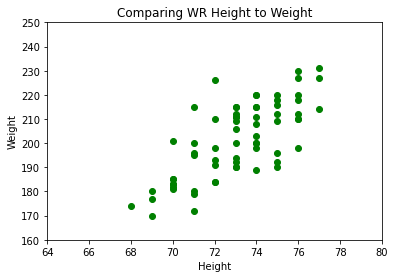

In [18]:
#making some fun graphs to show I can graph

plt.scatter(x = convert_data.inch_height, y = convert_data.weight, c = "green")

#setting the xlim and ylim are unnecessary with this graph but showing I can do them
plt.xlim(64, 80)
plt.ylim(160, 250)

#adding a title
plt.title(label = "Comparing WR Height to Weight")

#adding titles to x and y axes
plt.xlabel(xlabel = "Height")
plt.ylabel(ylabel = "Weight")


In [19]:
#jumping to for loops with an if-else statement and user input

n = int(input("How many pizzas do you want? "))


for i in range(1,n + 1):
  if n == 0:
    input("Why do you not want any? ")
    print("How unfortunate!")
  elif i == 1:
    print("I like to eat", i, "pizza a day.")
  else:
    print("I like to eat", i, "pizzas a day.")


How many pizzas do you want? 5
I like to eat 1 pizza a day.
I like to eat 2 pizzas a day.
I like to eat 3 pizzas a day.
I like to eat 4 pizzas a day.
I like to eat 5 pizzas a day.


In [20]:
#while-loop: basic example
x = 0
list_x = [1,2,3,4,5]

while x < 2:
  list_x.append(x)
  x += 1

print(list_x)

[1, 2, 3, 4, 5, 0, 1]
